# Nuclei Detect  demo

This notebook can be used to predict cells and nuclei given one has the sufficient model and data

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import random
#import requests
from io import BytesIO
from PIL import Image
import numpy as np
import os
import cv2
from matplotlib.image import imread


Those are the relevant imports for the detection model

In [11]:
from maskrcnn_benchmark.config import cfg
pylab.rcParams['figure.figsize'] = 20, 12

# importing the prediction class
from predictor import NUCLEIdemo

The NUCLEIdemo class can load the config file and does the image prediction.

In [12]:
configuration_file = "../configs/nuclei_1gpu_nonorm_offline.yaml"

# update the config options with the config file
cfg.merge_from_file(configuration_file)

# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

# change dimensions of test images
cfg.merge_from_list(['INPUT.MAX_SIZE_TEST','2049'])

# change number of classes
cfg.merge_from_list(['MODEL.ROI_BOX_HEAD.NUM_CLASSES','4'])

# change normalization, here model was not normalized
cfg.merge_from_list(['INPUT.PIXEL_MEAN', [0., 0., 0.]])

# define model to use here
cfg.merge_from_list(['MODEL.WEIGHT', '/home/maxsen/DEEPL/models_new/20190313_offline_augment/model_final.pth'])

# define how many objects can be identified per image
cfg.merge_from_list(['TEST.DETECTIONS_PER_IMG', '120'])

# show the configuration
#print(cfg)

Change the confidence threshold.

In [13]:
# load image
def load(path):
    pil_image = Image.open(path).convert("RGB")
    #print(pil_image)
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def load_matplot(path):
    img = imread(path)
    return img

def load_cv2(path):
    img = cv2.imread(path,cv2.IMREAD_ANYDEPTH)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    img = np.uint8(img)
    #img = cv2.convertScaleAbs(img)
    return img
'''
    >>> img = np.empty((100,100,1),dtype = np.uint16)
>>> image = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

>>> cvuint8 = cv2.convertScaleAbs(image)

>>> cvuint8.dtype
dtype('uint8')
    
'''

# show image alongside the result and save if necessary
def imshow(img, result, save_path=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches = 'tight')
        plt.show()
    else:
        plt.show()
        
def imshow_single(result, save_path=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

Let's define a few helper functions for loading images from a URL

In [14]:
nuclei_detect = NUCLEIdemo(
    cfg,
    min_image_size=1024,
    confidence_threshold=0.7,
)

### Define the image paths and show the results

AMEXP20181106_hyb1_DAPI_pos_79.png


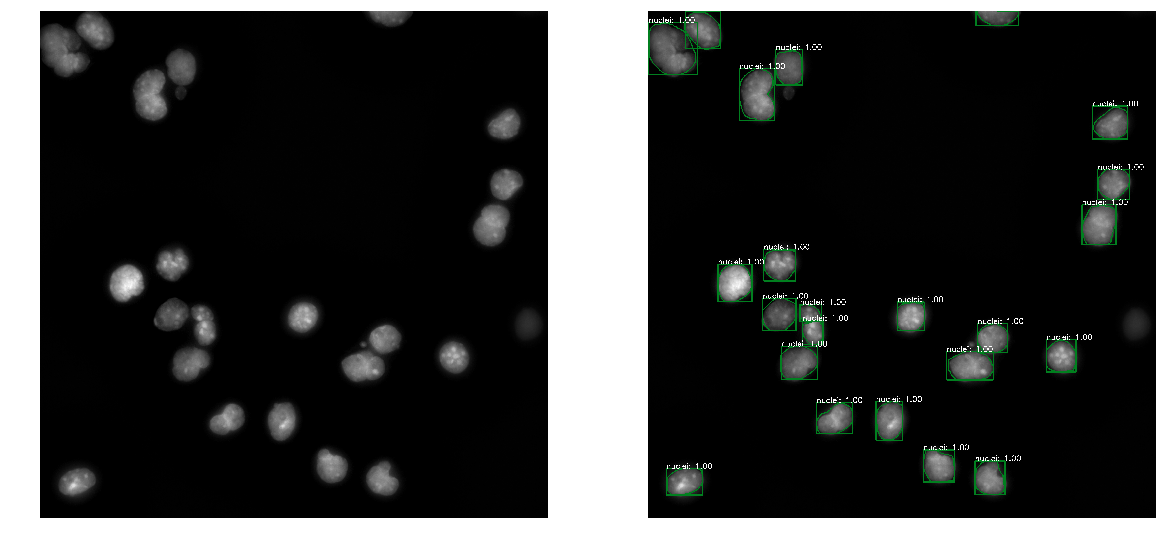

{'bbox': tensor([[ 919.5273, 1578.3987, 1026.7709, 1734.1404],
        [1605.8977, 1328.2987, 1725.6982, 1459.5680],
        [1109.7168, 1773.5507, 1236.9490, 1902.8048],
        [1813.7570,  642.2087, 1942.9301,  762.6263],
        [  73.2354, 1848.0095,  219.3295, 1955.7683],
        [ 461.7248, 1162.2568,  596.0333, 1292.1414],
        [ 515.0720,  160.2816,  623.4448,  302.7635],
        [1318.5309, 1818.8766, 1439.9984, 1954.6932],
        [1322.8677,    2.6851, 1494.7500,   62.8795],
        [1791.8970,  387.6984, 1934.2798,  520.6664],
        [   3.5997,   50.5843,  198.3988,  259.3311],
        [ 622.2322, 1251.3254,  705.4988, 1347.4924],
        [ 537.0718, 1355.8018,  683.1770, 1488.0710],
        [ 282.7271, 1024.8719,  419.6935, 1176.4115],
        [1749.2133,  785.9100, 1886.1913,  945.0302],
        [ 150.0286,    4.9794,  291.4235,  156.7416],
        [1204.6835, 1376.8314, 1391.4601, 1491.1112],
        [1005.1226, 1177.3236, 1113.9652, 1293.6522],
        [ 679.3167,

In [49]:
#img_path = '../../ms2/ssss/'
#img_path = '/data/proj/smFISH/Students/Max_Senftleben/files/data/20190309_aug_pop/ss/'
img_path = '/data/proj/smFISH/Simone/test_intron/AMEXP20181106/AMEXP20181106_hyb1/test_run_20181123_AMEXP20181106_hyb1_filtered_png/test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'

# random image is taken from the image path
random_img = random.choice(os.listdir(img_path))
random_img = 'AMEXP20181106_hyb1_DAPI_pos_79.png'
image = load(img_path + random_img)
image_matplot = load_matplot(img_path + random_img)
image_cv2 = load_cv2(img_path + random_img)

print(random_img)
result, prediction = nuclei_detect.run_on_opencv_image(image_cv2)
imshow(image_cv2, result, save_path='/home/max/github/ms2/Ale_example2.png')

print(vars(prediction))
